In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pathlib # directory handling
import random
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation

In [ ]:
import os
import zipfile
from google.colab import files

files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install numpy
!pip install keras
!pip install matplotlib

import os.path
from os import path

if path.exists('/content/newDataset') == False:
  os.mkdir('/content/newDataset')


os.chdir('/content/newDataset')
!pwd
!ls

/content/newDataset


In [ ]:
!pip install unzip
!unzip "/content/drive/MyDrive/yedekDataset/newDataset.zip" -d "/content/newDataset"

Streaming output truncated to the last 5000 lines.
  inflating: /content/newDataset/train/MILBERTS TORTOISESHELL/090.jpg  
  inflating: /content/newDataset/train/MILBERTS TORTOISESHELL/091.jpg  
  inflating: /content/newDataset/train/MILBERTS TORTOISESHELL/092.jpg  
  inflating: /content/newDataset/train/MILBERTS TORTOISESHELL/093.jpg  
  inflating: /content/newDataset/train/MILBERTS TORTOISESHELL/094.jpg  
  inflating: /content/newDataset/train/MILBERTS TORTOISESHELL/095.jpg  
  inflating: /content/newDataset/train/MILBERTS TORTOISESHELL/096.jpg  
  inflating: /content/newDataset/train/MILBERTS TORTOISESHELL/097.jpg  
  inflating: /content/newDataset/train/MILBERTS TORTOISESHELL/098.jpg  
  inflating: /content/newDataset/train/MILBERTS TORTOISESHELL/099.jpg  
  inflating: /content/newDataset/train/MILBERTS TORTOISESHELL/100.jpg  
  inflating: /content/newDataset/train/MILBERTS TORTOISESHELL/101.jpg  
  inflating: /content/newDataset/train/MILBERTS TORTOISESHELL/102.jpg  
  inflating: 

In [ ]:
import pandas as pd
pd.read_csv("/content/drive/MyDrive/newDataset/butterflies_AND_moths.csv")

,class id,filepaths,labels,data set
0,0,train/ADONIS/001.jpg,ADONIS,train
1,0,train/ADONIS/002.jpg,ADONIS,train
2,0,train/ADONIS/003.jpg,ADONIS,train
3,0,train/ADONIS/004.jpg,ADONIS,train
4,0,train/ADONIS/005.jpg,ADONIS,train
...,...,...,...,...
13589,99,valid/ZEBRA LONG WING/1.jpg,ZEBRA LONG WING,valid
13590,99,valid/ZEBRA LONG WING/2.jpg,ZEBRA LONG WING,valid
13591,99,valid/ZEBRA LONG WING/3.jpg,ZEBRA LONG WING,valid
13592,99,valid/ZEBRA LONG WING/4.jpg,ZEBRA LONG WING,valid


In [ ]:
train_dir = "/content/drive/MyDrive/newDataset/training"
test_dir = "/content/drive/MyDrive/newDataset/test"


In [ ]:
pd.read_csv("/content/drive/MyDrive/newDataset/training.csv")

,Epoch,loss,accuracy,F1_score,val_loss,val_accuracy,val_F1_score
0,1,5.226210,0.75290,0.665162,2.001779,0.938,0.929245
1,2,1.435009,0.94665,0.912901,0.975209,0.954,0.947070
2,3,0.857355,0.97130,0.956363,0.765548,0.960,0.953881
3,4,0.655860,0.98345,0.976639,0.679098,0.958,0.956769
4,5,0.539441,0.99065,0.986101,0.623349,0.954,0.954769
5,6,0.467418,0.99230,0.988818,0.544199,0.964,0.962712
6,7,0.404825,0.99415,0.991935,0.492052,0.962,0.962000
7,8,0.358726,0.99645,0.994503,0.455653,0.974,0.970872
8,9,0.327160,0.99615,0.994826,0.447779,0.966,0.967795
9,10,0.297498,0.99715,0.996272,0.466565,0.962,0.960974


In [ ]:
import pathlib
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['ADONIS' 'AFRICAN GIANT SWALLOWTAIL' 'AMERICAN SNOOT' 'AN 88' 'APPOLLO'
 'ARCIGERA FLOWER MOTH' 'ATALA' 'ATLAS MOTH' 'BANDED ORANGE HELICONIAN'
 'BANDED PEACOCK' 'BANDED TIGER MOTH' 'BECKERS WHITE'
 'BIRD CHERRY ERMINE MOTH' 'BLACK HAIRSTREAK' 'BLUE MORPHO'
 'BLUE SPOTTED CROW' 'BROOKES BIRDWING' 'BROWN ARGUS' 'BROWN SIPROETA'
 'CABBAGE WHITE' 'CAIRNS BIRDWING' 'CHALK HILL BLUE' 'CHECQUERED SKIPPER'
 'CHESTNUT' 'CINNABAR MOTH' 'CLEARWING MOTH' 'CLEOPATRA'
 'CLODIUS PARNASSIAN' 'CLOUDED SULPHUR' 'COMET MOTH' 'COMMON BANDED AWL'
 'COMMON WOOD-NYMPH' 'COPPER TAIL' 'CRECENT' 'CRIMSON PATCH'
 'DANAID EGGFLY' 'EASTERN COMA' 'EASTERN DAPPLE WHITE'
 'EASTERN PINE ELFIN' 'ELBOWED PIERROT' 'EMPEROR GUM MOTH'
 'GARDEN TIGER MOTH' 'GIANT LEOPARD MOTH' 'GLITTERING SAPPHIRE'
 'GOLD BANDED' 'GREAT EGGFLY' 'GREAT JAY' 'GREEN CELLED CATTLEHEART'
 'GREEN HAIRSTREAK' 'GREY HAIRSTREAK' 'HERCULES MOTH'
 'HUMMING BIRD HAWK MOTH' 'INDRA SWALLOW' 'IO MOTH' 'Iphiclus sister'
 'JULIA' 'LARGE MARBLE' 'LUNA MOTH

In [ ]:
len(class_names)


100

In [ ]:
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    # set up the target directory
    target_dir = target_dir + "/"
    target_folder = target_dir + target_class

    #Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    #Read the image and plot the image using matplotlib
    img = mpimg.imread(target_folder + "/" +random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print("Image shape : {}".format(img.shape))

['101.jpg']
Image shape : (224, 224, 3)


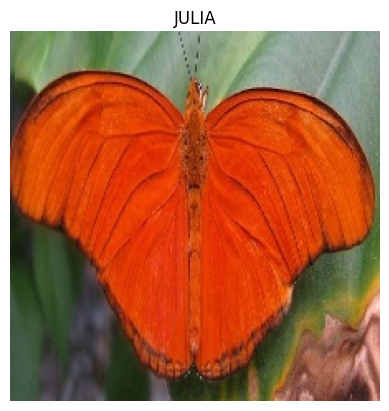

In [ ]:
import random
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

In [ ]:
random.choice(class_names)

'QUESTION MARK'

In [ ]:
random.sample(os.listdir(train_dir+ "/" + 'APPOLLO'), 15)


['127.jpg',
 '056.jpg',
 '104.jpg',
 '083.jpg',
 '077.jpg',
 '066.jpg',
 '032.jpg',
 '006.jpg',
 '047.jpg',
 '080.jpg',
 '001.jpg',
 '124.jpg',
 '114.jpg',
 '013.jpg',
 '020.jpg']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#DATA PREPERATION
# Rescale
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

# Load data from directories and turn it into batches

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size = 32,
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224, 224),
                                               batch_size = 32,
                                               class_mode = "categorical")

Found 12596 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


In [ ]:
model = Sequential([
    Conv2D(10, 3, input_shape = (224, 224, 3)),
    Activation(activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(100, activation = "softmax")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 activation_1 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                 

In [ ]:
model.compile(loss = "categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

In [ ]:
history_1 = model.fit(train_data,
                      epochs = 16,
                      steps_per_epoch = len(train_data),
                      validation_data = test_data,
                      validation_steps = len(test_data))

Epoch 1/16
394/394 [==============================] - 3071s 8s/step - loss: 3.0910 - accuracy: 0.2910 - val_loss: 1.9442 - val_accuracy: 0.5060
Epoch 2/16
394/394 [==============================] - 724s 2s/step - loss: 1.0239 - accuracy: 0.7445 - val_loss: 1.8677 - val_accuracy: 0.5760
Epoch 3/16
394/394 [==============================] - 737s 2s/step - loss: 0.1633 - accuracy: 0.9599 - val_loss: 2.5442 - val_accuracy: 0.5360
Epoch 4/16
394/394 [==============================] - 715s 2s/step - loss: 0.0316 - accuracy: 0.9927 - val_loss: 2.8048 - val_accuracy: 0.5260
Epoch 5/16
394/394 [==============================] - 702s 2s/step - loss: 0.0259 - accuracy: 0.9948 - val_loss: 2.7235 - val_accuracy: 0.5400
Epoch 6/16
394/394 [==============================] - 689s 2s/step - loss: 0.0260 - accuracy: 0.9941 - val_loss: 2.9969 - val_accuracy: 0.5340
Epoch 7/16
394/394 [==============================] - 658s 2s/step - loss: 0.0184 - accuracy: 0.9954 - val_loss: 3.4741 - val_accuracy: 0.522